# Programming Assignment 6 [Support Vector Machines]

Class: INF552

Student: Jiashi Chen

USCID: 4684194123

## Part 1: Implementation

#### Import necessary module

In [1]:
import pandas as pd
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

### Part (a) linear

#### Obtain data

In [2]:
def obtain_data(filename):
    col_names = ["X1", "X2", "Label"]
    data = pd.read_csv(filename, names = col_names)
    return data

In [3]:
data_lin = obtain_data("linsep.txt")
data_lin

,X1,X2,Label
0,0.841958,0.850168,1
1,0.233077,0.868845,-1
2,0.239182,0.815853,-1
3,0.934774,0.657329,1
4,0.998767,0.324128,1
...,...,...,...
95,0.679815,0.904680,1
96,0.617873,0.416534,1
97,0.779193,0.989354,1
98,0.689667,0.721418,1


In [4]:
def obtain_X_Label(dataset):
    X = np.mat(dataset[["X1", "X2"]])
    Label = np.mat(dataset["Label"])
    return X, Label

In [5]:
X_lin, Label_lin = obtain_X_Label(data_lin)

####  Use Quadratic Programming solver

$$
Min\quad\frac{1}{2}\times\alpha^T Q\alpha + (\vec{-1})^T\alpha \\
s.t., 0 \leq\alpha\leq\infty \\
\quad y^T\alpha=0 \\
$$

In [6]:
def QPP(X, Label):
    N = Label_lin.shape[1]
    Q = np.zeros([N, N])
    for i in range(N):
        for j in range(i, N):
            Q[i, j] = Q[j, i] = Label[0, i] * Label[0, j] * (X[i] * X[j].T)[0][0]
    P = matrix(Q)
    q = matrix((-1) * np.ones(N))  #vector (-1)
    G = matrix((-1) * np.diag(np.ones(N)))  #for the inequality
    h = matrix(np.zeros(N))    #for the inequality
    A = matrix(Label.A, (1, N), "d")  #for the equality
    b = matrix(0.) #for the equali
    return np.array(solvers.qp(P, q, G, h, A, b)['x'])

#### Calculate weight

$\vec{w}=\Sigma\alpha_ny_n\vec{w}_n$

In [7]:
def obtain_W(support_vectors, X, Label, a):
    weight = np.mat(np.zeros(2))
    for i in support_vectors:
        weight += a[i]*X[i]*Label[0, i]
    return weight

#### Main function to implement SVM

In [8]:
def SVM_lin(X, Label):
    a = QPP(X, Label)
    support_vectors = np.where(a>0.01)[0]
    W = obtain_W(support_vectors, X, Label, a)
    b = Label[0, support_vectors[0]] - W * X[support_vectors[0]].T
    return W, b,support_vectors

#### Fit the model

In [9]:
W, b, SVs = SVM_lin(X_lin, Label_lin)
print("Weight is",W)
print("Interception is", b)
print("Support Vectors are", SVs)

     pcost       dcost       gap    pres   dres
 0: -2.0636e+01 -4.3905e+01  3e+02  2e+01  2e+00
 1: -2.2372e+01 -3.7202e+01  9e+01  5e+00  5e-01
 2: -2.3112e+01 -3.8857e+01  5e+01  2e+00  2e-01
 3: -2.8318e+01 -3.3963e+01  1e+01  4e-01  4e-02
 4: -3.2264e+01 -3.3927e+01  2e+00  1e-02  1e-03
 5: -3.3568e+01 -3.3764e+01  2e-01  1e-03  1e-04
 6: -3.3737e+01 -3.3739e+01  2e-03  1e-05  1e-06
 7: -3.3739e+01 -3.3739e+01  2e-05  1e-07  1e-08
 8: -3.3739e+01 -3.3739e+01  2e-07  1e-09  1e-10
Optimal solution found.
Weight is [[ 7.25005616 -3.86188932]]
Interception is [[-0.10698729]]
Support Vectors are [27 83 87]


#### Plot the result of classification and equation of the line

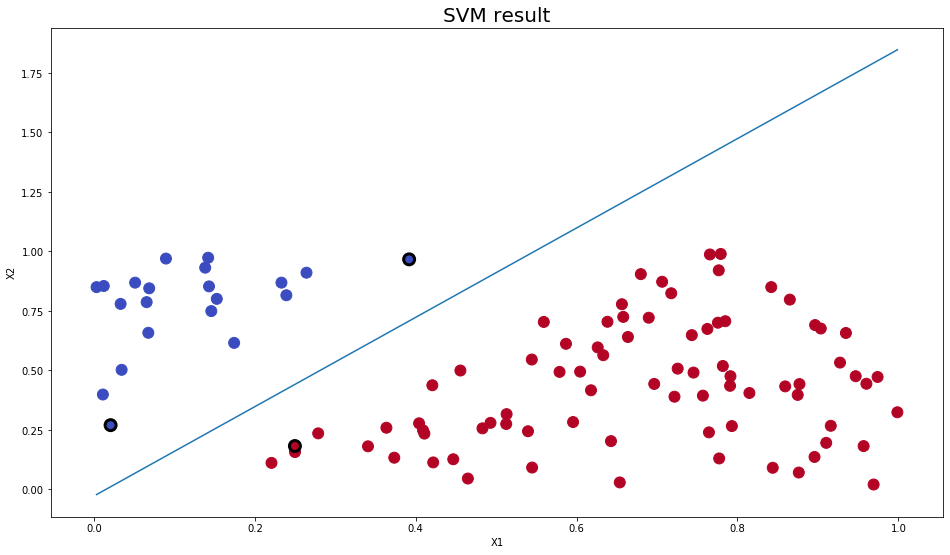

In [10]:
array_X1 = np.array(X_lin[:,0].T)[0]
array_X2 = np.array(X_lin[:,1].T)[0]
array_Label = np.array(Label_lin)[0]

plt.figure(figsize=(16,9))

# Plot the line
linear_line_x1_min = min(array_X1)
linear_line_x1_max = max(array_X1)
linear_line_x2_correspond_min = (-1) * (W[0,0] * linear_line_x1_min + b[0, 0])/W[0,1]
linear_line_x2_correspond_max = (-1) * (W[0,0] * linear_line_x1_max + b[0, 0])/W[0,1]
plt.plot([linear_line_x1_min,linear_line_x1_max], [linear_line_x2_correspond_min,linear_line_x2_correspond_max])

#Plot all of the point
plt.scatter(array_X1, array_X2, c = array_Label, cmap = "coolwarm", s = 120)

#Plot the SVs
SVs_X1 = array_X1[SVs]
SVs_X2 = array_X2[SVs]
plt.scatter(SVs_X1, SVs_X2, facecolors='none', edgecolors='black', linewidths=3, s = 120)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM result", fontsize = 20)

plt.show()

### Part (b) nonlinear

#### Obtain data

In [11]:
data_nonlin = obtain_data("nonlinsep.txt")
data_nonlin

,X1,X2,Label
0,13.147033,-19.811823,1
1,10.245927,7.953735,1
2,-20.567695,8.684645,1
3,-13.584656,21.940365,1
4,-14.231219,8.576612,1
...,...,...,...
95,9.901435,-0.314831,-1
96,-4.983494,8.318166,-1
97,-5.060830,6.041874,-1
98,1.924059,-6.335260,-1


In [12]:
X_nonlin, Label_nonlin = obtain_X_Label(data_nonlin)

#### Design kernel function

$$ 
Kernel Function:
k(x_1, x_2)=(<x_1,x_2>+1)^2$$

In [13]:
def kernel(x1, x2):
    return (1 + x1 * x2.T)**2

In [14]:
def transition(xi):
    x1 = xi[0,0]
    x2 = xi[0,1]
    return np.mat([1, x1**2, x2**2, np.sqrt(2)*x1, np.sqrt(2)*x2,  np.sqrt(2)*x1*x2])

#### Use Quadratic Programming solver with kernel

In [15]:
def QPP_kernel(X, Label):
    N = Label_lin.shape[1]
    Q = np.zeros([N, N])
    for i in range(N):
        for j in range(i, N):
            Q[i, j] = Q[j, i] = Label[0, i] * Label[0, j] * kernel(X[i], X[j])[0][0]
    P = matrix(Q)
    q = matrix((-1) * np.ones(N))  #vector (-1)
    G = matrix((-1) * np.diag(np.ones(N)))  #for the inequality
    h = matrix(np.zeros(N))    #for the inequality
    A = matrix(Label.A, (1, N), "d")  #for the equality
    b = matrix(0.) #for the equali
    return np.array(solvers.qp(P, q, G, h, A, b)['x'])

#### Calculate weigh

In [16]:
def obtain_W_kernel(support_vectors, X, Label, a):
    weight = np.mat(np.zeros(transition(X[0]).shape[1]))
    for i in support_vectors:
        weight += a[i]*transition(X[i])*Label[0, i]
    return weight

#### Main function to implement SVM with kernel

In [17]:
def SVM_kernel(X, Label):
    a = QPP_kernel(X, Label)
    support_vectors = np.where(a>0.001)[0]
    W = obtain_W_kernel(support_vectors, X, Label, a)
    b = Label[0, support_vectors[0]] - W * transition(X[support_vectors[0]]).T
    return W, b, support_vectors

In [18]:
W, b, SVs = SVM_kernel(X_nonlin, Label_nonlin)
print("Weight is",W)
print("Interception is", b)
print("Support Vectors are", SVs)

     pcost       dcost       gap    pres   dres
 0: -4.0666e+01 -1.0206e+02  5e+02  2e+01  3e+00
 1: -1.5924e+02 -2.2789e+02  3e+02  1e+01  1e+00
 2: -2.9280e+02 -3.6244e+02  3e+02  1e+01  1e+00
 3: -5.7710e+02 -6.0303e+02  4e+02  9e+00  1e+00
 4: -1.2873e+03 -1.2409e+03  5e+02  9e+00  1e+00
 5: -1.2647e+03 -1.0924e+03  7e+02  8e+00  9e-01
 6: -6.9076e+02 -4.0802e+02  1e+03  5e+00  6e-01
 7: -1.8688e+02 -2.9779e+01  4e+02  1e+00  2e-01
 8: -3.4731e+00 -5.2038e-02  1e+01  3e-02  4e-03
 9: -3.5053e-02 -3.8447e-02  1e-01  3e-04  3e-05
10: -2.1413e-02 -2.7448e-02  6e-03  1e-17  2e-13
11: -2.6166e-02 -2.6328e-02  2e-04  4e-18  1e-13
12: -2.6293e-02 -2.6295e-02  2e-06  3e-18  1e-13
13: -2.6295e-02 -2.6295e-02  2e-08  5e-18  2e-13
Optimal solution found.
Weight is [[ 8.64344220e-10  1.60702131e-01  1.58698040e-01 -9.47655776e-03
  -3.85759106e-02 -1.10224094e-03]]
Interception is [[-16.66005249]]
Support Vectors are [ 5 36 51 55 94 95]


#### Plot the result of classification and equation of the line

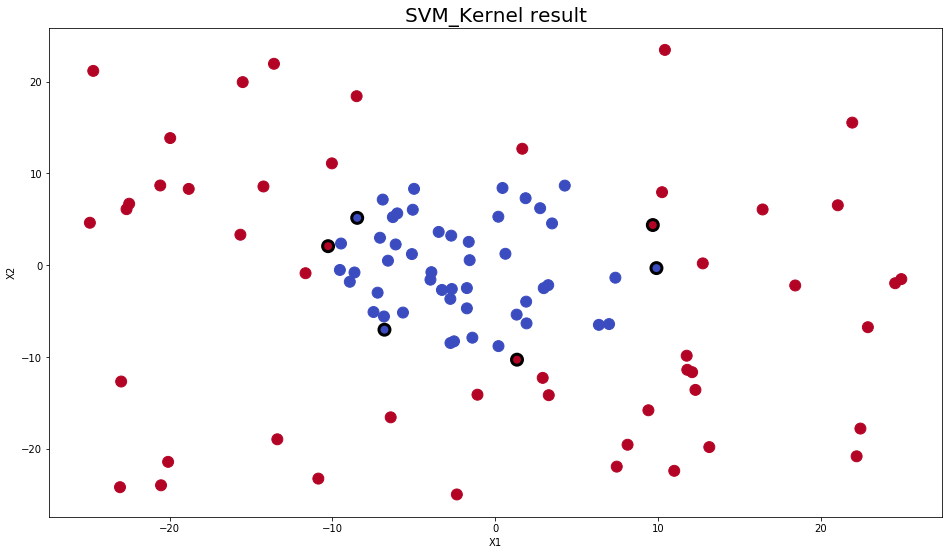

In [19]:
array_X1 = np.array(X_nonlin[:,0].T)[0]
array_X2 = np.array(X_nonlin[:,1].T)[0]
array_Label = np.array(Label_nonlin)[0]

plt.figure(figsize=(16,9))

#Plot all of the point
plt.scatter(array_X1, array_X2, c = array_Label, cmap = "coolwarm", s = 120)

#Plot the SVs
SVs_X1 = array_X1[SVs]
SVs_X2 = array_X2[SVs]
plt.scatter(SVs_X1, SVs_X2, facecolors='none', edgecolors='black', linewidths=3, s = 120)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM_Kernel result", fontsize = 20)

plt.show()

## Part 2: Software Familiarization

#### Import necessary module

In [20]:
from sklearn.svm import SVC

#### Linear Situation

In [21]:
clf_linear = SVC(kernel="linear")
clf_linear.fit(X_lin, np.array(Label_lin)[0])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
print("Weight is", clf_linear.coef_[0])
print("Intercept is", clf_linear.intercept_)

Weight is [ 3.59965788 -2.03198838]
Intercept is [0.21848298]


#### No-linear Situation

In [23]:
clf_nonlinear = SVC(kernel='poly', degree = 2)
clf_nonlinear.fit(X_nonlin, np.array(Label_nonlin)[0])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
print("Weight is", clf_nonlinear.dual_coef_)
print("Intercept is", clf_nonlinear.intercept_)

Weight is [[-1.         -1.         -1.         -0.82999867 -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          0.82999867  1.          1.        ]]
Intercept is [-1.70566938]
